In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import model_from_json

In [5]:
path = 'imagem.jpg'

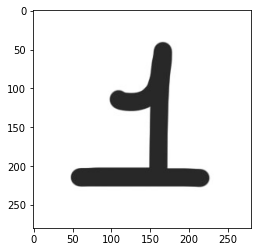

In [26]:
imagem =  plt.imread(path)
plt.imshow(imagem)


In [30]:
# rotina para deixa a imagem cinza

resolution =  np.shape(imagem)
imagem_cinza = np.zeros((resolution[0],resolution[1])) # Array que vai levar nossa imagem em cinza

for i in range(resolution[0]):
  for j in range(resolution[1]):
    arg = np.mean(imagem[j][i])
    pixel = int(arg)
    imagem_cinza[i][j] = 255 - pixel

In [40]:
# Rotina para diminuir a resolução da imagem
def resize(imagem):
    res = np.shape(imagem)

    example = np.zeros((28,28), dtype = int)

    for y in range(28):
        for x in range(28):
            mean = 0
            lin = x * 10
            col = y * 10
            for i in range(10):
                for j in range(10):
                    mean = mean + imagem[i+lin][j+col]
            example[y][x] = mean / 100
    return example

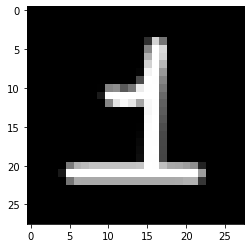

In [50]:
img = resize(imagem_cinza)

plt.imshow(img , cmap= 'gray')

In [57]:
plt.imsave('img.jpg', img)
print(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  40 178  98
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 112 215 182
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 148 215 177
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 177 215 155
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   4 20

In [68]:
#carregando modelo
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

#carreganod pesos

loaded_model.load_weights('model.h5')

In [83]:
example = img.astype(np.uint8)
example.shape
test = np.array([example, example])

test.shape

(2, 28, 28)

In [85]:
pred = loaded_model.predict(test[:1])
print(pred)

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
